# Data analysis project :  Forbes Highest Paid Athletes 1990-2020

## Introduction

In this project, I apply my knowledge of data analysis to explore the Forbes highest-paid athletes between the years 1990 and 2020. The dataset is sourced from Kaggle, and the objective of this project is purely educational, aimed at enhancing my data analysis skills.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Read in the data
dataframe = pd.read_csv('Dataset/Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')

In [3]:
#We display key information about the dataset 
dataframe.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [5]:
dataframe.shape

(301, 8)

In [6]:
dataframe.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


## 1. Data cleaning 

### Handling Missing Values

In [7]:
#We display the sum of Missing Values
dataframe.isna().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [8]:
#Display all rows with NaN values
dataframe[dataframe.isna().any(axis=1)]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


The 'Previous Year Rank' column is not pertinent to the analysis of the highest-paid athletes, so it can be safely removed to streamline the dataset.

In [9]:
#We delete the columns 
dataframe.drop("Previous Year Rank", axis=1, inplace=True)

In [10]:
dataframe.columns

Index(['S.NO', 'Name', 'Nationality', 'Current Rank', 'Sport', 'Year',
       'earnings ($ million)'],
      dtype='object')

### Data Type Correction

In [11]:
#Display all columns types
dataframe.dtypes

S.NO                      int64
Name                     object
Nationality              object
Current Rank              int64
Sport                    object
Year                      int64
earnings ($ million)    float64
dtype: object

In [12]:
#Display the memory usage
dataframe.memory_usage().sum()

16988

In [13]:
#Transform columns to date types
dataframe["Year"] = pd.to_datetime(dataframe['Year'], format='%Y')

### Outlier Detection

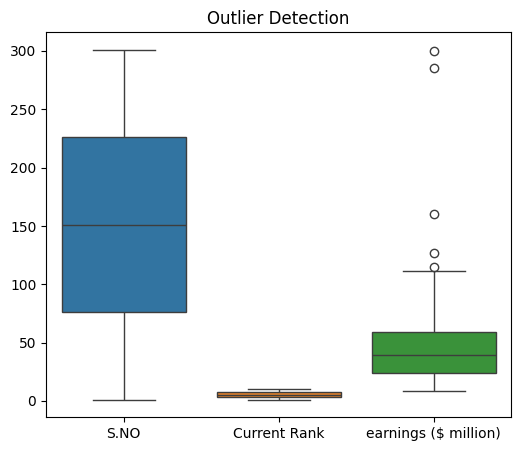

In [14]:
#Create a boxplot to visualize outliers in numeric columns.
plt.figure(figsize=(6, 5))  # Ajustez la hauteur ici
sns.boxplot(data=dataframe)
plt.title("Outlier Detection")
plt.show()

Even if the current rankings don't display well in the boxplot, we can only see outliers in the earnings. Let's refine the analysis a bit to determine whether the data remains consistent or if there are errors.

In [15]:
#Calculate IQR 

In [16]:
Q3 = dataframe['earnings ($ million)'].quantile(0.75)
Q1 = dataframe['earnings ($ million)'].quantile(0.25)
IQR = Q3 - Q1

In [17]:
upper_outliers = Q3 + 1.5 * IQR

In [18]:
#Display upper outlier range
outliers_earnings = dataframe[dataframe['earnings ($ million)'] > upper_outliers]

In [19]:
outliers_earnings

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)
171,172,Tiger Woods,USA,1,golf,2008-01-01,115.0
241,242,Floyd Mayweather,USA,1,Boxing,2015-01-01,300.0
242,243,Manny Pacquiao,Philippines,2,Boxing,2015-01-01,160.0
271,272,Floyd Mayweather,USA,1,Boxing,2018-01-01,285.0
281,282,Lionel Messi,Argentina,1,Soccer,2019-01-01,127.0


So we can see that there is no error; these people earn this amount of money, so we can keep this row in our dataset.

### Remove Duplicates

In [20]:
#Display duplicates rox
duplicates = dataframe[dataframe.duplicated(subset='S.NO', keep=False)]

In [21]:
duplicates

,S.NO,Name,Nationality,Current Rank,Sport,Year,earnings ($ million)


There are no duplicate rows in the dataset.

## 2. Exploratory Data Analysis (EDA)

## Project Objective

The aim of this project is to analyze the data on the highest-paid athletes according to Forbes from 1990 to 2020. The analysis will address the following key questions:

---

### 1. Top 5 Highest Paid Athletes of All Time
We will identify the five athletes who have accumulated the highest earnings.

---

### 2. Top 5 Sports with the Highest Earnings
Which five sports generate the most revenue for their athletes?

---

### 3. Top 5 Nationalities with the Highest Earnings
What are the fivetop_paid_athletes = earnings_by_athlete.nlargest(3, 'earnings ($ million)')◊ nationalities that dominate the rankings in terms of athlete earnings?

---

### 4. The Year with the Highest Earnings
Which year saw the most highest earnings?


In [22]:
# Display summary statistics
dataframe.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301,301.000000
mean,151.000000,5.448505,2005-02-14 11:57:36.478405376,45.516279
min,1.000000,1.000000,1990-01-01 00:00:00,8.100000
25%,76.000000,3.000000,1997-01-01 00:00:00,24.000000
50%,151.000000,5.000000,2005-01-01 00:00:00,39.000000
75%,226.000000,8.000000,2013-01-01 00:00:00,59.400000
max,301.000000,10.000000,2020-01-01 00:00:00,300.000000
std,87.035433,2.850995,NaN,33.525337


### 1.Top 5 Highest Paid Athletes of All Time

In [23]:
# Display the top 5 highest paid athletes
earnings_by_athlete = dataframe.groupby('Name')['earnings ($ million)'].sum().reset_index()

In [24]:
top5_paid_athletes = earnings_by_athlete.nlargest(5, 'earnings ($ million)')

In [25]:
top5_paid_athletes.reset_index()

,index,Name,earnings ($ million)
0,78,Tiger Woods,1373.8
1,45,LeBron James,844.8
2,25,Floyd Mayweather,840.0
3,14,Cristiano Ronaldo,787.1
4,68,Roger Federer,781.1


<Axes: >

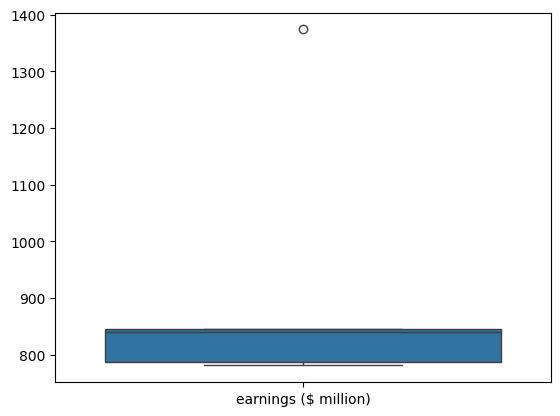

In [26]:
sns.boxplot(data=top5_paid_athletes)

If we look at the box plot, we can see that Tiger Woods' earnings are considered an outlier.

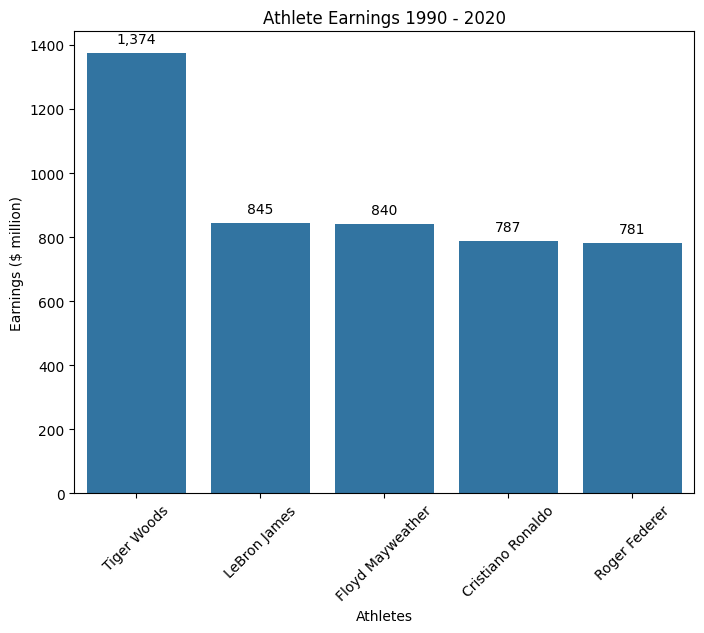

In [27]:
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=top5_paid_athletes, x="Name", y="earnings ($ million)")
plt.xticks(rotation=45)
plt.title("Athlete Earnings 1990 - 2020")
plt.xlabel("Athletes")
plt.ylabel("Earnings ($ million)")
# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', 
                      va='bottom', 
                      fontsize=10, 
                      color='black', 
                      xytext=(0, 5),  # Offset text slightly above the bar
                      textcoords='offset points')



### 2. Top 5 Sports with the Highest Earnings

In [29]:
# Display the top 5 sports with highest earnings
earnings_by_sports = dataframe.groupby('Sport')['earnings ($ million)'].sum().reset_index()

In [32]:
top5_sports_paid = earnings_by_sports.nlargest(5, 'earnings ($ million)')

In [34]:
top5_sports_paid.reset_index()

,index,Sport,earnings ($ million)
0,6,Basketball,2477.5
1,17,Soccer,1816.0
2,7,Boxing,1743.2
3,24,golf,1086.9
4,10,Golf,1049.6


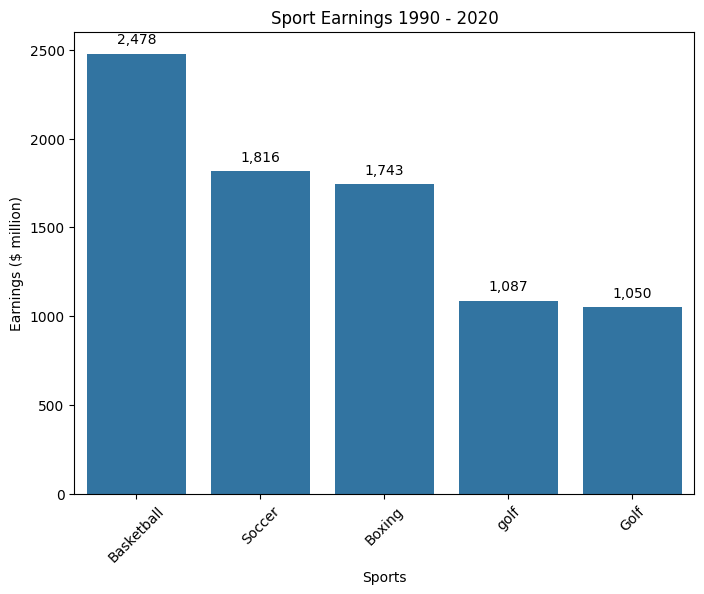

In [38]:
#Plot a figure to have a better visualisations.
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=top5_sports_paid, x="Sport", y="earnings ($ million)")
plt.xticks(rotation=45)
plt.title("Sport Earnings 1990 - 2020")
plt.xlabel("Sports")
plt.ylabel("Earnings ($ million)")
# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', 
                      va='bottom', 
                      fontsize=10, 
                      color='black', 
                      xytext=(0, 5),  # Offset text slightly above the bar
                      textcoords='offset points')


### 3.  Top 5 Nationalities with the Highest Earnings

In [40]:
# Display the top 5 sports with highest earnings
earnings_by_nationality = dataframe.groupby('Nationality')['earnings ($ million)'].sum().reset_index()

top5_Nationality = earnings_by_nationality.nlargest(5, 'earnings ($ million)')

top5_Nationality.reset_index()

,index,Nationality,earnings ($ million)
0,21,USA,8786.3
1,15,Portugal,787.1
2,19,Switzerland,781.1
3,0,Argentina,715.5
4,9,Germany,639.0


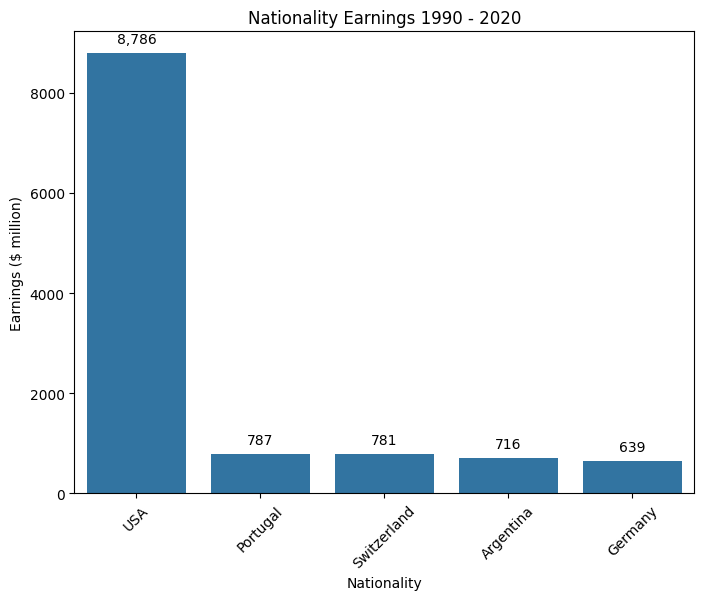

In [41]:
#Plot a figure to have a better visualisations.
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(data=top5_Nationality, x="Nationality", y="earnings ($ million)")
plt.xticks(rotation=45)
plt.title("Nationality Earnings 1990 - 2020")
plt.xlabel("Nationality")
plt.ylabel("Earnings ($ million)")
# Annotate each bar with the value
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', 
                      va='bottom', 
                      fontsize=10, 
                      color='black', 
                      xytext=(0, 5),  # Offset text slightly above the bar
                      textcoords='offset points')


### 4. The Year with the Highest Earnings

In [54]:
top_years = dataframe.groupby('Year')['earnings ($ million)'].sum().reset_index()
top_years

,Year,earnings ($ million)
0,1990-01-01,128.0
1,1991-01-01,183.5
2,1992-01-01,158.7
3,1993-01-01,178.3
4,1994-01-01,148.9
5,1995-01-01,229.1
6,1996-01-01,273.1
7,1997-01-01,338.1
8,1998-01-01,281.4
9,1999-01-01,357.5


Text(0.5, 1.0, '30 Years of Earnings Growth: 1990 to 2020')

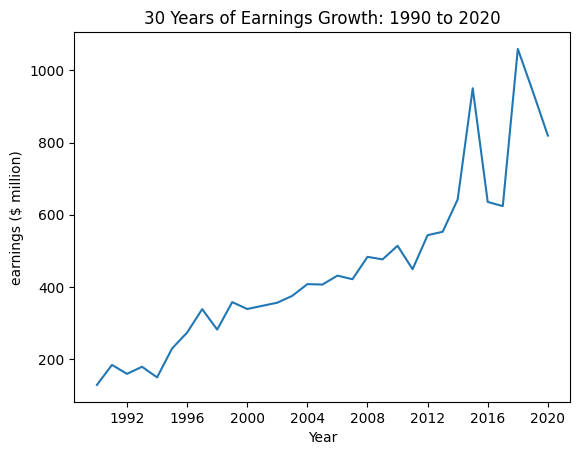

In [60]:
sns.lineplot(data=top_years, x="Year", y="earnings ($ million)")
plt.title("30 Years of Earnings Growth: 1990 to 2020")

We can observe a clear progression in revenues over the years.

In [77]:
#Display the max earnings years
max_earnings = top_years["earnings ($ million)"].max()
#Find the coresponding years
year_with_max_earnings = top_years[top_years["earnings ($ million)"] == max_earnings]["Year"].values[0]
#Extract only year
years_only = pd.to_datetime(year_with_max_earnings).year

In [84]:
print(f"The year with the highest earnings is {years_only} with {max_earnings} million in generated earnings.")

The year with the highest earnings is 2018 with 1059.4 million in generated earnings.


## Conclusion

In this project, we analyzed the earnings data of the highest-paid athletes according to Forbes from 1990 to 2020. The key findings from our analysis are as follows:

- **Top Highest Paid Athlete of All Time**: We identified the athlete who has accumulated the highest earnings over the years. Notably, Tiger Woods stands out as the athlete with the most significant earnings.

- **Top Sport with the Highest Earnings**: The analysis revealed that basketball generates the most revenue for athletes, highlighting the sport's lucrative nature compared to others.

- **Top Nationalities with the Highest Earnings**: The United States dominates the rankings with the highest earnings, showcasing the country's strong influence in the sports industry.

- **The Year with the Highest Earnings**: We discovered that there has been a clear progression in athlete earnings over the years, with peaks observed at various intervals since 1990. The year that generated the most was **2018**, with earnings reaching **$1,059 million**.

Overall, this analysis not only provides insights into the earnings of athletes but also emphasizes the growing financial landscape of sports. The trends observed reflect changes in market dynamics, sponsorships, and athlete popularity over the past three decades.

The findings underscore the significant impact of sports on the global economy and offer a compelling narrative about the evolution of athlete earnings.